In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000737468"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000737468
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,WASHINGTON TRUST BANCORP INC
Ticker,WASH


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,1.809404e+01,4.317604e+00,11.23,14.3,17.61,21.82,27.15
interest income,22.0,3.596241e+07,6.103878e+06,27118000.00,31619250.0,34191500.00,38642250.00,50194000.00
net income,57.0,8.753719e+06,3.621154e+06,2670000.00,6073000.0,7777000.00,10935000.00,17674000.00
net interest income,53.0,2.251172e+07,5.950619e+06,14621000.00,16261000.0,22411000.00,26263000.00,34584000.00
provision for loan losses,53.0,7.811321e+05,6.709083e+05,0.00,300000.0,600000.00,1000000.00,3000000.00


# Plots

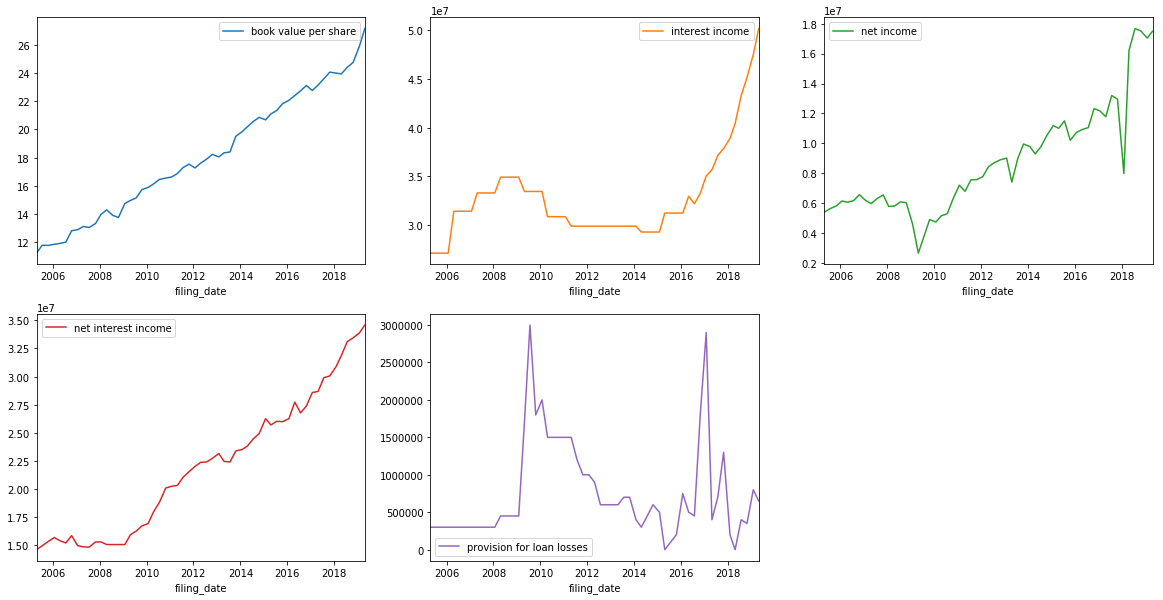

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000737468 interest income             2005Q2 to 2005Q4: 3 periods  missing   
           interest income             2006Q2 to 2006Q4: 3 periods  missing   
           interest income             2007Q2 to 2007Q4: 3 periods  missing   
           interest income             2008Q2 to 2008Q4: 3 periods  missing   
           interest income             2009Q2 to 2009Q4: 3 periods  missing   
           interest income             2010Q2 to 2010Q4: 3 periods  missing   
           interest income            2011Q2 to 2013Q4: 11 periods  missing   
           interest income             2014Q2 to 2014Q4: 3 periods  missing   
           interest income             2015Q2 to 2015Q4: 3 periods  missing   
           net interest income                              2007Q4  missing   
           net interest income         2008Q2 to 2008Q4: 3 periods  missing   
           provision for loan losses                        2007Q4  missing   
           provision for loan losses   2008Q2 to 2008Q4: 3 periods  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000737468 interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()